In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from classifier_choice import *

In [3]:
digits = datasets.load_digits()

In [4]:
data = digits.data
labels = digits.target

In [5]:
n_samples, n_features = data.shape

In [6]:
methods = [ 'pca', 'isomap', 'lle', 'mlle', 'hlle', 'ltsa', 'mds', 'trees','tsne']

In [7]:
from matplotlib import offsetbox
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(20,15))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

<class 'sklearn.decomposition.truncated_svd.TruncatedSVD'>
<class 'sklearn.manifold.isomap.Isomap'>
<class 'sklearn.manifold.locally_linear.LocallyLinearEmbedding'>
<class 'sklearn.manifold.locally_linear.LocallyLinearEmbedding'>
<class 'sklearn.manifold.locally_linear.LocallyLinearEmbedding'>
<class 'sklearn.manifold.locally_linear.LocallyLinearEmbedding'>
<class 'sklearn.manifold.mds.MDS'>
<class 'sklearn.pipeline.Pipeline'>
<class 'sklearn.manifold.t_sne.TSNE'>


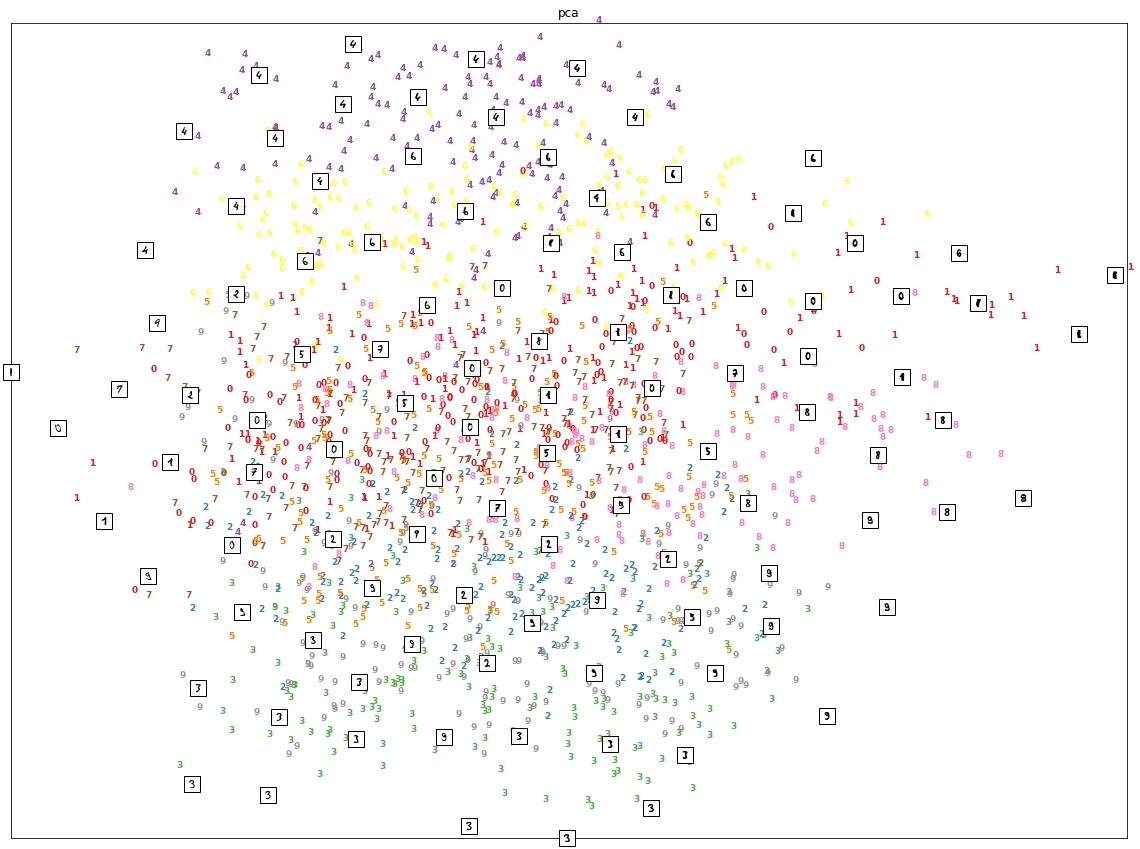

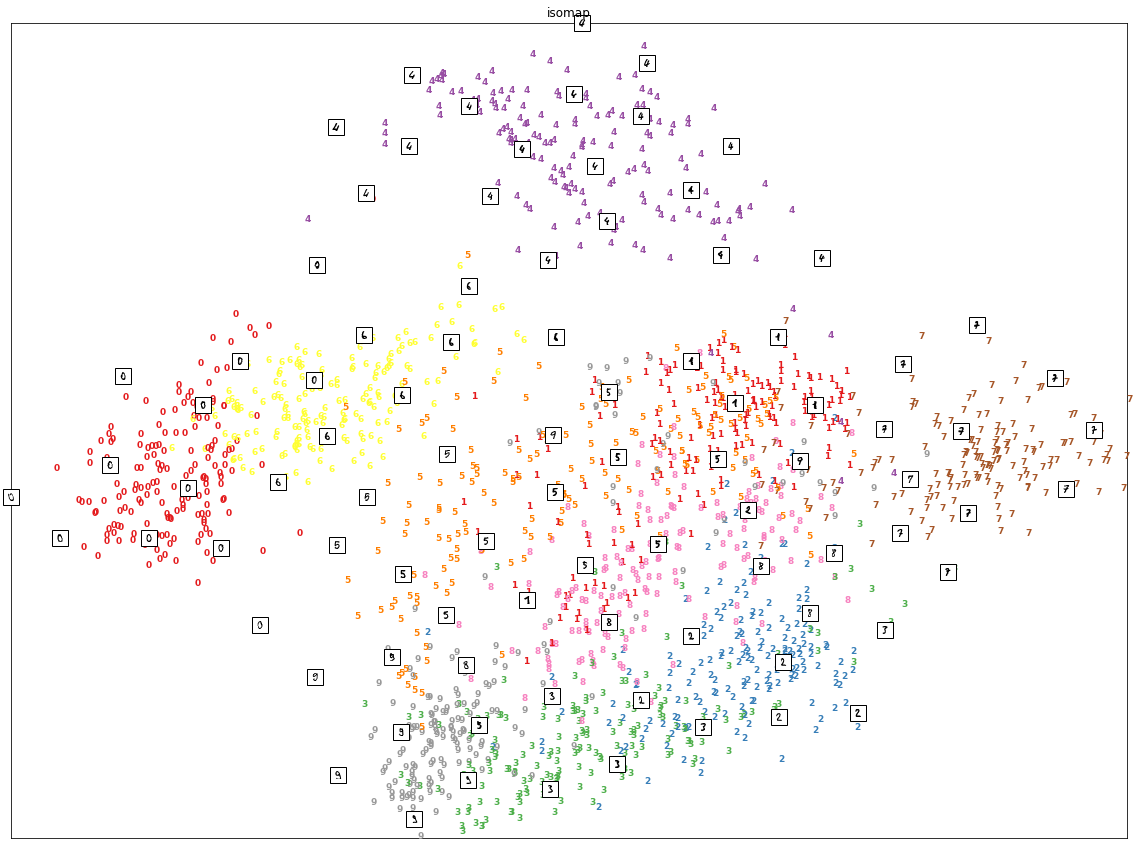

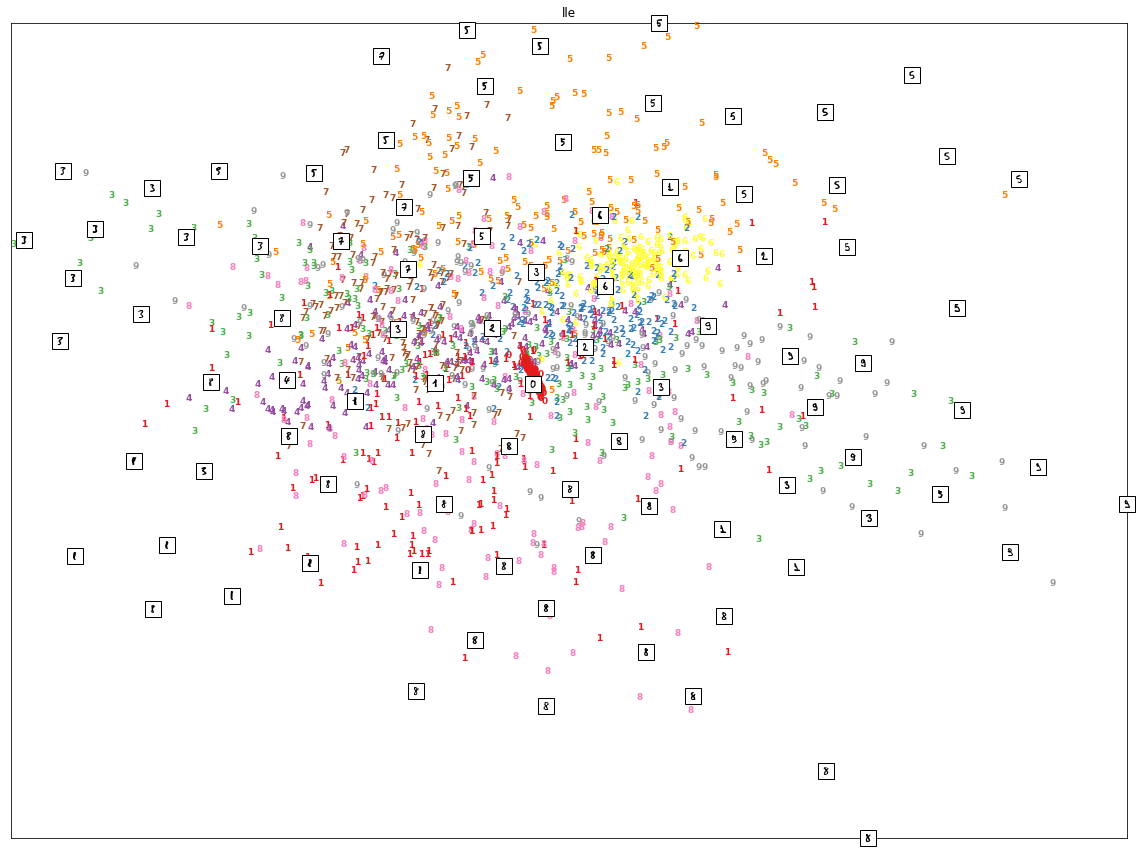

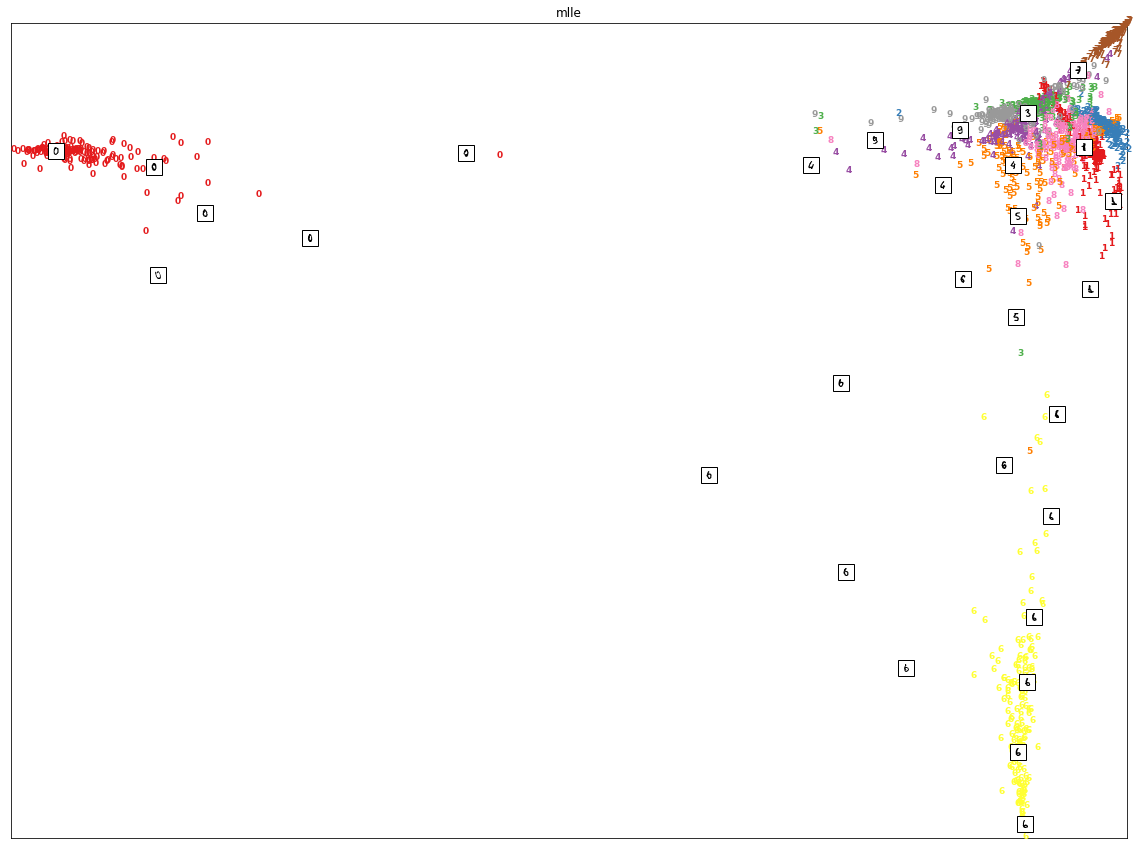

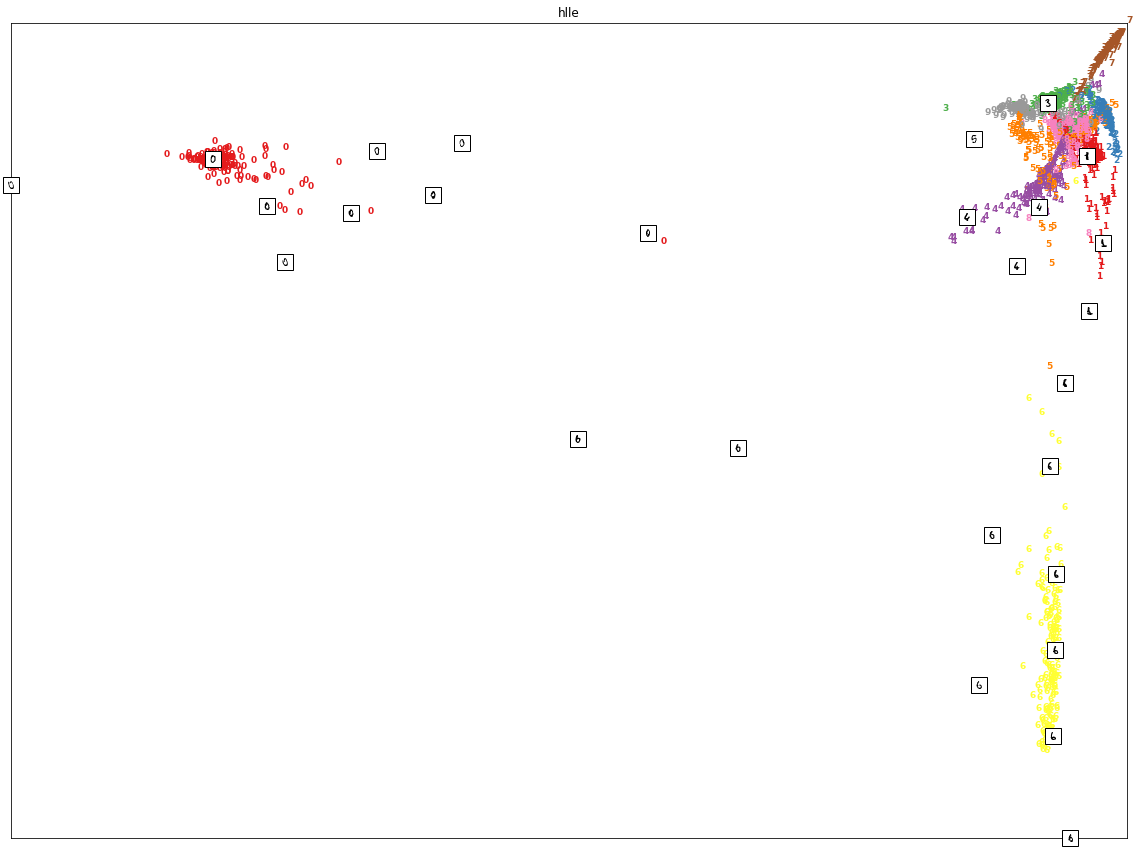

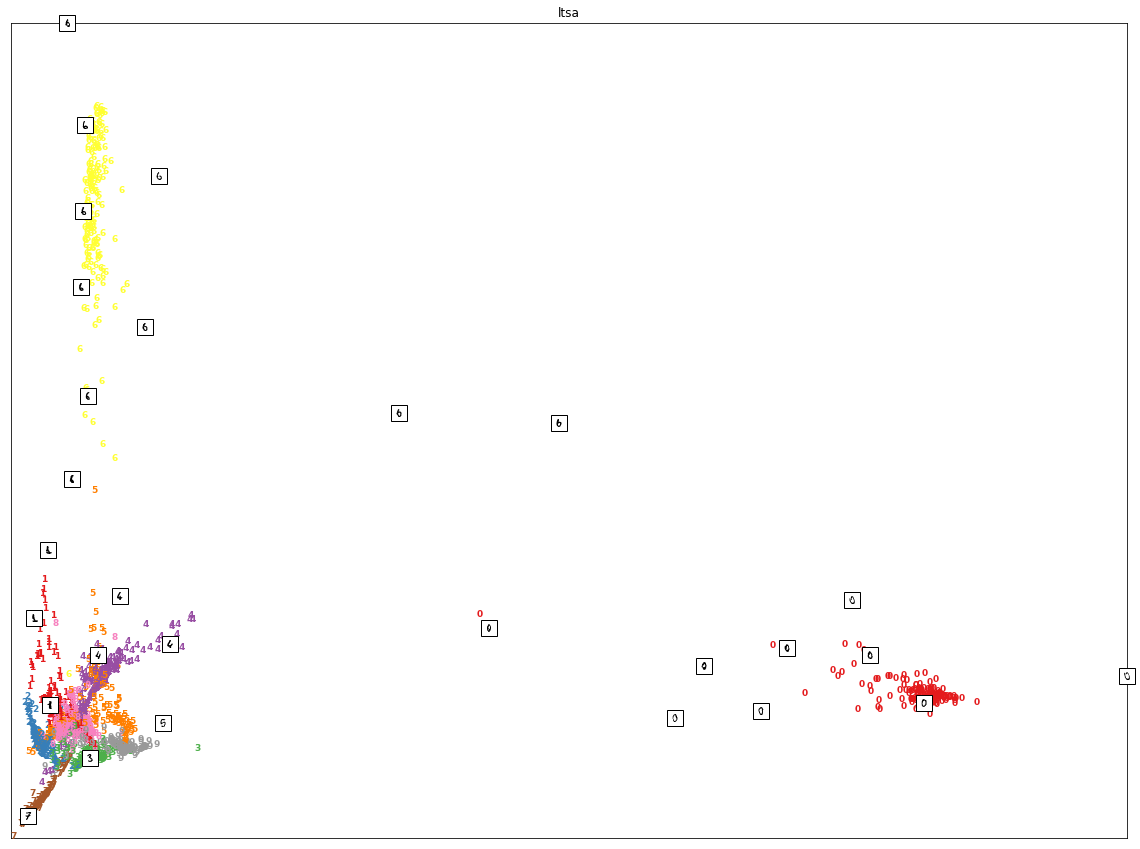

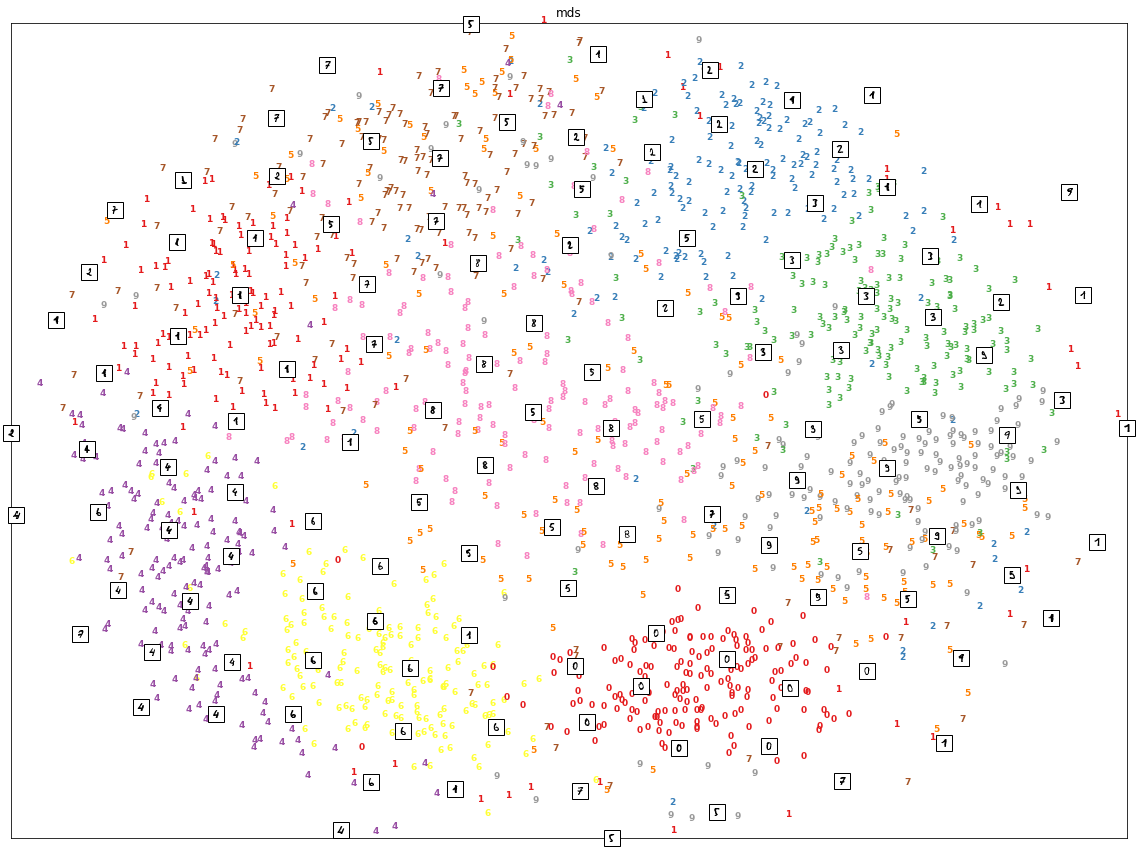

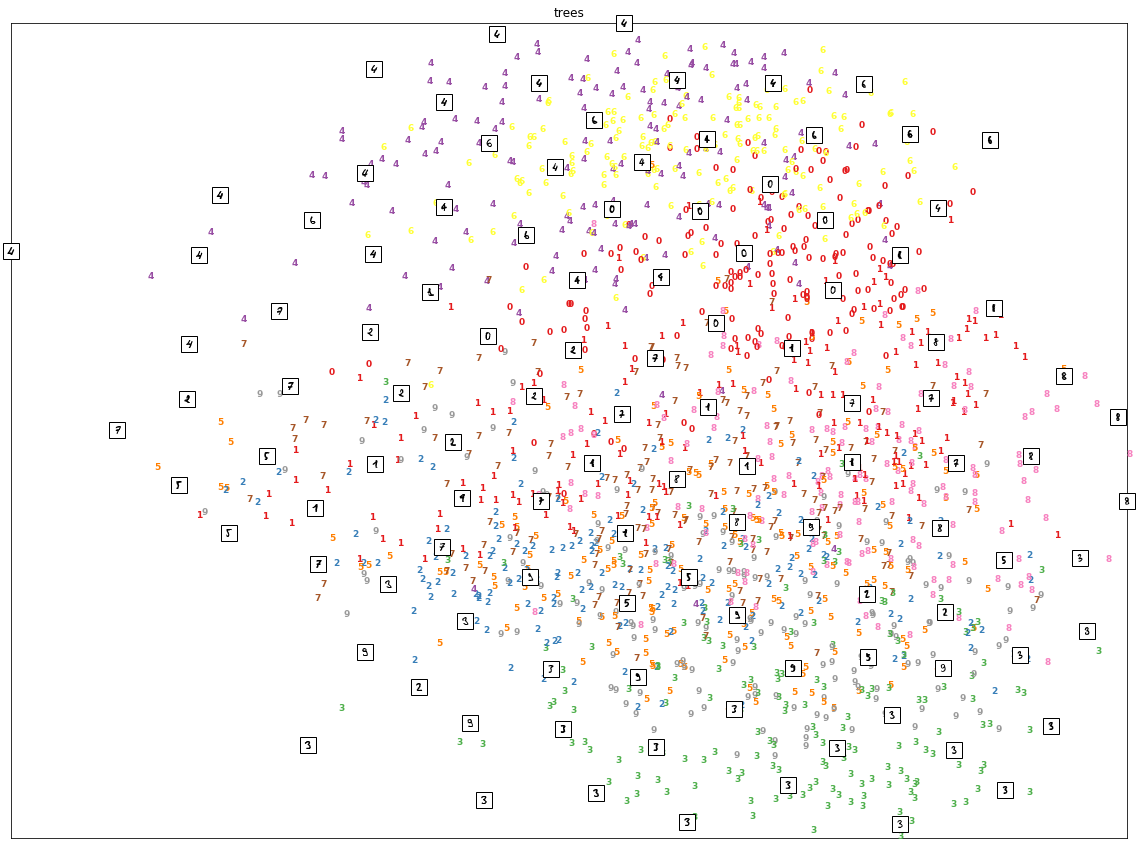

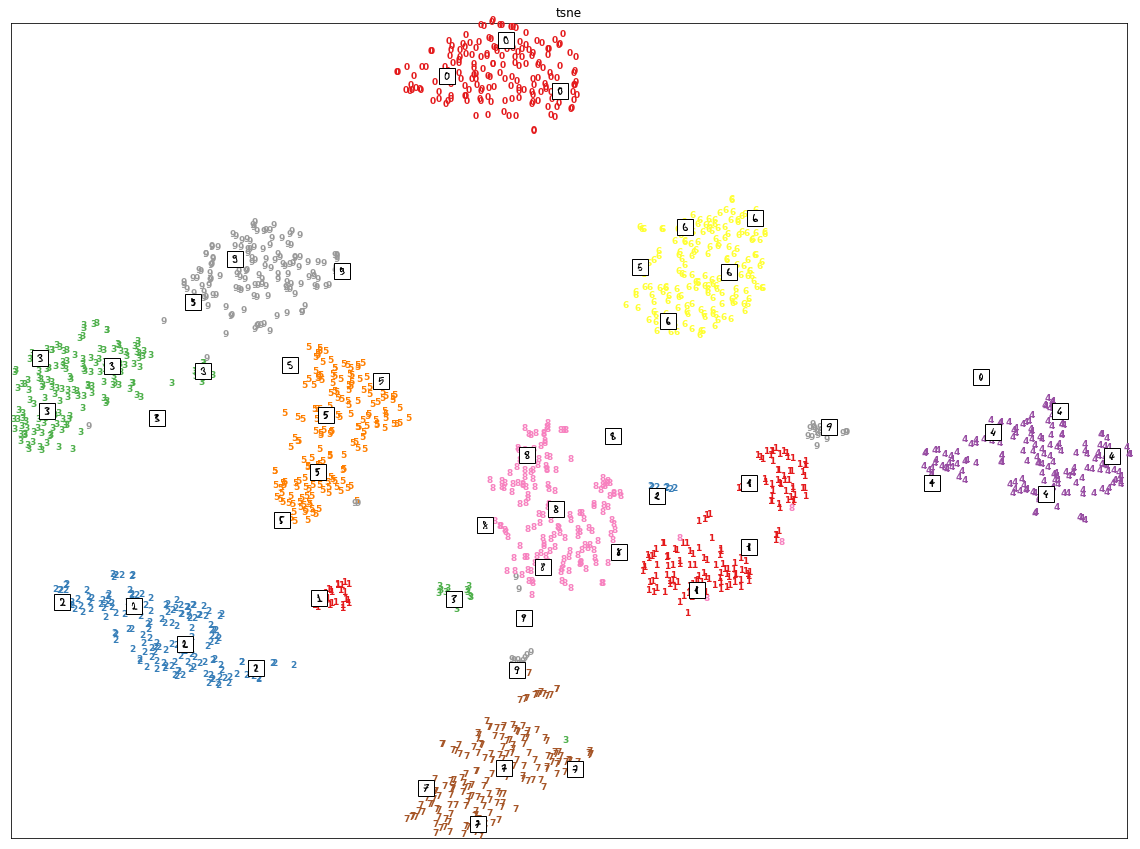

In [8]:
for mathod in methods:
    clf = classifier_choice(mathod)
    clusters = data_fit(clf,data)
    plot_embedding(clusters,labels,mathod)
plt.show()

sklearn.manifold.t_sne.TSNE